Unzip datasets and prepare data:

In [1]:
from collections import Counter

from sklearn.model_selection import train_test_split

import seaborn as sns
from multi_imbalance.datasets import load_datasets
import numpy as np


%matplotlib inline
sns.set_style('darkgrid')
dataset_name = 'new_ecoli'
dataset = load_datasets()[dataset_name]

X, y = dataset.data, dataset.target
print(Counter(y))
# BRACID currently only supports binary classification problems
y_mask = (y == 0) | (y == 1)
X = X[y_mask]
y = y[y_mask]

y = np.array([str(y_) for y_ in y])

print(X.shape)
print(y.shape)
print(Counter(y))
print(X[:5])
print(y[:5])


Counter({0: 145, 1: 77, 4: 52, 2: 37, 3: 25})
(222, 7)
(222,)
Counter({'0': 145, '1': 77})
[[0.49 0.29 0.48 0.5  0.56 0.24 0.35]
 [0.07 0.4  0.48 0.5  0.54 0.35 0.44]
 [0.56 0.4  0.48 0.5  0.49 0.37 0.46]
 [0.59 0.49 0.48 0.5  0.52 0.45 0.36]
 [0.23 0.32 0.48 0.5  0.55 0.25 0.35]]
['0' '0' '0' '0' '0']


In [2]:
from multi_imbalance.classifiers.bracid import BRACID

classifier = BRACID()

Compare results by plotting data in 2 dimensions

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import logging

logger = logging.getLogger("bracid")
logger.disabled = True

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.5,
                                                    random_state=42)

classifier.fit(X_train, y_train)

There were 303 iterations for label=1: : 303it [14:28,  2.87s/it]     


In [4]:
y_pred = classifier.predict(X_test)

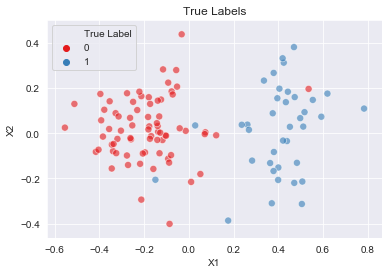

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

X_test = pca.transform(X_test)

df = pd.DataFrame(
    {'X1': X_test[:, 0], 'X2': X_test[:, 1], 'True Label': y_test,
     'Predicted Label': y_pred})

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a scatter plot to visualize the results
sns.scatterplot(data=df, x='X1', y='X2', hue='True Label', palette='Set1',
                alpha=0.6, s=50)
plt.title('True Labels')
plt.show()

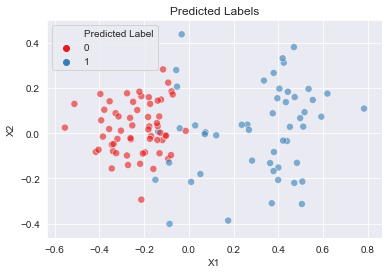

In [6]:
sns.scatterplot(data=df, x='X1', y='X2', hue='Predicted Label', palette='Set1',
                alpha=0.6, s=50)
plt.title('Predicted Labels')
plt.show()

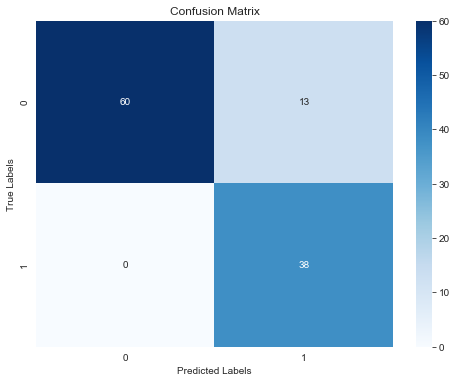

In [7]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()